In [2]:
import math
import pandas_datareader as web
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')

In [3]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 11.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
 import yfinance as yf
 yf.pdr_override()
 yf

<module 'yfinance' from '/usr/local/lib/python3.7/dist-packages/yfinance/__init__.py'>

In [5]:
goog=yf.Ticker('goog')
df=goog.history( start='2012-01-03', end='2022-07-10')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,147611217,0,0.0
2012-01-04,16.563665,16.693678,16.453827,16.644611,114989399,0,0.0
2012-01-05,16.491436,16.537264,16.344486,16.413727,131808205,0,0.0
2012-01-06,16.417213,16.438385,16.184088,16.189817,108119746,0,0.0
2012-01-09,16.102144,16.114599,15.472754,15.503389,233776981,0,0.0
...,...,...,...,...,...,...,...
2022-07-01,108.336998,109.806351,107.105003,109.081001,31028000,0,0.0
2022-07-05,107.514503,114.052597,106.249496,113.887001,36398000,0,0.0
2022-07-06,114.092003,116.351997,112.250504,115.213501,28852000,0,0.0


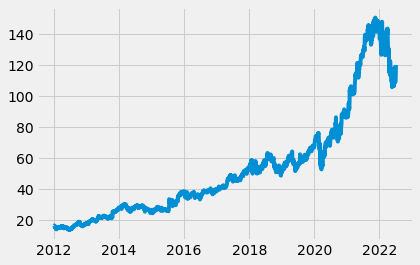

In [6]:
plt.plot(df['Close'])

In [7]:
#Filter by close
dataset = df.filter(['Close'])
# A numpy array from dataset
data = dataset.values

In [8]:
#Getting length of train
train_data_len = math.ceil( len(data) *  .8 )
train_data_len


2117

In [9]:
#Scale Data
scaler = MinMaxScaler( feature_range = (0,1) )
scaled_data  = scaler.fit_transform( data )
scaled_data

array([[0.01936668],
       [0.01988927],
       [0.01820133],
       ...,
       [0.74050141],
       [0.77042063],
       [0.77672618]])

In [12]:
#Create the training dataset
from sklearn.model_selection import train_test_split


In [41]:
x_train, x_test, y_train, y_test =train_test_split(scaled_data,scaled_data,test_size=0.2,shuffle=False,random_state=0)


In [42]:
#Build the LSTM mode
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [43]:
#Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
model.fit(x_train, y_train, batch_size=1 ,epochs=1)

2116/2116 [==============================] - 11s 4ms/step - loss: 7.5695e-04


In [96]:
predictions= model.predict(x_test)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse


0.003173418830432271

In [97]:
predictions = scaler.inverse_transform(predictions)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


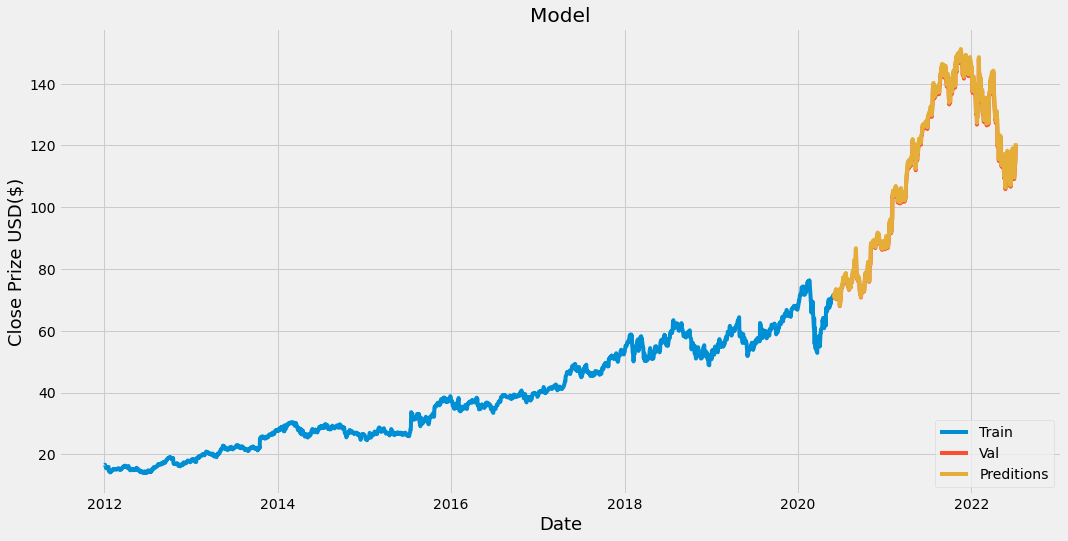

In [98]:
#Plot the data
train = dataset[:train_data_len]
valid= dataset[train_data_len-1:]
valid['Predictions']=predictions
# Vissualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Prize USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

plt.legend(['Train','Val','Preditions'],loc='lower right')
plt.show()


